<a href="https://colab.research.google.com/github/A00785001/TC5035/blob/main/00_ROS_bag_Reading_LiDAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROS Bag 2D LiDAR Data Reader
Extract and visualize LiDAR data from ROS bags

## Section 1: Read and Visualize LiDAR Data

In [2]:
# Install required packages
# Cell 1: Install Dependencies
!pip install --quiet --upgrade jinja2>=3.1.2 markupsafe>=2.1.0
!pip install --quiet bagpy opencv-python pillow pandas matplotlib seaborn

print("✓ All packages installed successfully!")
print("If you see dependency warnings, they're usually safe to ignore.")
print("Only restart runtime if imports fail.")

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bagpy 0.5 requires jinja2<3.1, but you have jinja2 3.1.6 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 3.1.2 requires jinja2>=3.1.2, but you have jinja2 3.0.3 which is incompatible.
sphinx 8.2.3 requires Jinja2>=3.1, but you have jinja2 3.0.3 which is incompatible.
✓ All packages installed successfully!
If you see dependency warnings, they're usually safe to ignore.
Only restart runtime if imports fail.


In [3]:
# Import libraries
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from glob import glob
import json
from datetime import datetime

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Specify the path to your ROS bag file within the shared folder
data_path = "/content/drive/MyDrive/DATA/Artificial_Intelligence/MNA-V/Subjects/TC5035-Proyecto_Integrador/TC5035.data/"
ROS_bgas_path = "ROS_bags/"

# Change to the specified subfolder
os.chdir(data_path)

print(f"Changed directory to: {os.getcwd()}")

Changed directory to: /content/drive/MyDrive/DATA/Artificial_Intelligence/MNA-V/Subjects/TC5035-Proyecto_Integrador/TC5035.data


In [6]:
ROS_bag_subfolder = 'session_20251016_133216'
print(f"Using session: {ROS_bag_subfolder}")


Using session: session_20251016_133216


In [7]:
bag_name = 'session_data.bag'
bag_file = data_path +_+ ROS_bgas_path + ROS_bag_subfolder + '/'+ bag_name

In [8]:
# Read the bag file
bag = bagreader(bag_file)
print(f"Opened bag file: {bag_file}")

[INFO]  Data folder /content/drive/MyDrive/DATA/Artificial_Intelligence/MNA-V/Subjects/TC5035-Proyecto_Integrador/TC5035.data/ROS_bags/session_20251016_133216/session_data already exists. Not creating.
Opened bag file: /content/drive/MyDrive/DATA/Artificial_Intelligence/MNA-V/Subjects/TC5035-Proyecto_Integrador/TC5035.data/ROS_bags/session_20251016_133216/session_data.bag


In [9]:
# List all topics in the bag
print("Topics in bag:")
print(bag.topic_table)
print("\nLook for LiDAR topics like: /scan, /lidar/scan, /laser_scan, etc.")

Topics in bag:
                            Topics                             Types  \
0                         /cmd_vel               geometry_msgs/Twist   
1                 /constraint_list    visualization_msgs/MarkerArray   
2           /csi_cam_0/camera_info            sensor_msgs/CameraInfo   
3  /csi_cam_0/image_raw/compressed       sensor_msgs/CompressedImage   
4                             /imu                   sensor_msgs/Imu   
5                            /odom                 nav_msgs/Odometry   
6                            /scan             sensor_msgs/LaserScan   
7                     /submap_list  cartographer_ros_msgs/SubmapList   
8                              /tf                tf2_msgs/TFMessage   
9            /trajectory_node_list    visualization_msgs/MarkerArray   

   Message Count     Frequency  
0          11418     22.415888  
1            109      2.055993  
2           7785  17848.102128  
3            100      0.247299  
4           9553  22192.084

In [10]:
# Specify your LiDAR topic (common for Waveshare Jetbot with RPLidar)
lidar_topic = "/scan"  # Modify if your topic is different
print(f"Using LiDAR topic: {lidar_topic}")

Using LiDAR topic: /scan


In [11]:
# Extract LiDAR data from the topic
print(f"Extracting LiDAR data from topic: {lidar_topic}")
lidar_csv_path = bag.message_by_topic(lidar_topic)
print(f"LiDAR data extracted to: {lidar_csv_path}")

Extracting LiDAR data from topic: /scan
LiDAR data extracted to: /content/drive/MyDrive/DATA/Artificial_Intelligence/MNA-V/Subjects/TC5035-Proyecto_Integrador/TC5035.data/ROS_bags/session_20251016_133216/session_data/scan.csv


In [12]:
# Load LiDAR data from CSV
print("Loading LiDAR data...")
lidar_df = pd.read_csv(lidar_csv_path)

print(f"\nLoaded {len(lidar_df)} LiDAR messages")
print(f"\nDataFrame shape: {lidar_df.shape}")
print(f"\nColumn names:")
print(lidar_df.columns.tolist())

Loading LiDAR data...

Loaded 315 LiDAR messages

DataFrame shape: (315, 2306)

Column names:
['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id', 'angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max', 'ranges_0', 'ranges_1', 'ranges_2', 'ranges_3', 'ranges_4', 'ranges_5', 'ranges_6', 'ranges_7', 'ranges_8', 'ranges_9', 'ranges_10', 'ranges_11', 'ranges_12', 'ranges_13', 'ranges_14', 'ranges_15', 'ranges_16', 'ranges_17', 'ranges_18', 'ranges_19', 'ranges_20', 'ranges_21', 'ranges_22', 'ranges_23', 'ranges_24', 'ranges_25', 'ranges_26', 'ranges_27', 'ranges_28', 'ranges_29', 'ranges_30', 'ranges_31', 'ranges_32', 'ranges_33', 'ranges_34', 'ranges_35', 'ranges_36', 'ranges_37', 'ranges_38', 'ranges_39', 'ranges_40', 'ranges_41', 'ranges_42', 'ranges_43', 'ranges_44', 'ranges_45', 'ranges_46', 'ranges_47', 'ranges_48', 'ranges_49', 'ranges_50', 'ranges_51', 'ranges_52', 'ranges_53', 'ranges_54', 'ranges_55', '

In [13]:
# Display first few rows
print("First few rows of LiDAR data:")
lidar_df.head()

First few rows of LiDAR data:


,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,angle_min,angle_max,angle_increment,time_increment,scan_time,...,intensities_1137,intensities_1138,intensities_1139,intensities_1140,intensities_1141,intensities_1142,intensities_1143,intensities_1144,intensities_1145,intensities_1146
0,1.760650e+09,1610,1760649849,759624225,laser_frame,-3.141593,3.141593,0.005483,0.000117,0.134082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.760650e+09,1611,1760649849,894033009,laser_frame,-3.141593,3.141593,0.005483,0.000107,0.122517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.760650e+09,1612,1760649850,16881068,laser_frame,-3.141593,3.141593,0.005483,0.000118,0.134815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.760650e+09,1613,1760649850,152021576,laser_frame,-3.141593,3.141593,0.005483,0.000118,0.134831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.760650e+09,1614,1760649850,287199481,laser_frame,-3.141593,3.141593,0.005483,0.000118,0.134721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Display basic statistics (filtering invalid values)
print("LiDAR data statistics (valid readings only):")

# Create a copy with only numeric columns
numeric_cols = lidar_df.select_dtypes(include=[np.number]).columns
clean_df = lidar_df[numeric_cols].replace([np.inf, -np.inf], np.nan)

clean_df.describe()

LiDAR data statistics (valid readings only):


,Time,header.seq,header.stamp.secs,header.stamp.nsecs,angle_min,angle_max,angle_increment,time_increment,scan_time,range_min,...,intensities_1137,intensities_1138,intensities_1139,intensities_1140,intensities_1141,intensities_1142,intensities_1143,intensities_1144,intensities_1145,intensities_1146
count,3.150000e+02,315.000000,3.150000e+02,3.150000e+02,315.000000,315.000000,3.150000e+02,315.000000,315.000000,3.150000e+02,...,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,1.760650e+09,2453.219048,1.760650e+09,5.086129e+08,-3.141593,3.141593,5.482710e-03,0.000117,0.133747,1.500000e-01,...,15.368254,15.666667,15.666667,15.517460,15.815873,16.114286,16.263492,15.965079,15.368254,14.025397
std,1.469708e+02,875.137048,1.175199e+02,2.985886e+08,0.000000,0.000000,2.606225e-17,0.000003,0.003544,5.559947e-17,...,22.083317,22.191265,22.191265,22.137861,22.243536,22.344714,22.393636,22.294684,22.083317,21.539609
min,1.760650e+09,1610.000000,1.760650e+09,5.645882e+06,-3.141593,3.141593,5.482710e-03,0.000103,0.118311,1.500000e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.760650e+09,1688.500000,1.760650e+09,2.410094e+08,-3.141593,3.141593,5.482710e-03,0.000117,0.134538,1.500000e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.760650e+09,2021.000000,1.760650e+09,5.221946e+08,-3.141593,3.141593,5.482710e-03,0.000118,0.134744,1.500000e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.760650e+09,3350.500000,1.760650e+09,7.728799e+08,-3.141593,3.141593,5.482710e-03,0.000118,0.134858,1.500000e-01,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
max,1.760650e+09,4064.000000,1.760650e+09,9.962127e+08,-3.141593,3.141593,5.482710e-03,0.000122,0.140143,1.500000e-01,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000


In [15]:
# Parse LaserScan data
# LaserScan messages contain arrays in string format, we need to parse them

def parse_array_string(array_str):
    """
    Parse array string from bagpy CSV into numpy array
    Example: '[1.2, 3.4, 5.6]' -> np.array([1.2, 3.4, 5.6])
    """
    if pd.isna(array_str) or array_str == '':
        return np.array([])

    # Remove brackets and split by comma
    array_str = str(array_str).strip('[]')
    if array_str == '':
        return np.array([])

    try:
        values = [float(x.strip()) for x in array_str.split(',') if x.strip()]
        return np.array(values)
    except:
        return np.array([])

print("Array parsing function ready!")

Array parsing function ready!


In [17]:
# Extract scan parameters from first message
first_scan = lidar_df.iloc[0]

print("LaserScan Parameters:")
print(f"  angle_min: {first_scan['angle_min']:.4f} rad")
print(f"  angle_max: {first_scan['angle_max']:.4f} rad")
print(f"  angle_increment: {first_scan['angle_increment']:.6f} rad")
print(f"  time_increment: {first_scan['time_increment']:.6f} sec")
print(f"  scan_time: {first_scan['scan_time']:.4f} sec")
print(f"  range_min: {first_scan['range_min']:.4f} m")
print(f"  range_max: {first_scan['range_max']:.4f} m")

# Parse ranges from first scan
# Select all columns that start with 'ranges_'
range_columns = [col for col in lidar_df.columns if col.startswith('ranges_')]
ranges_sample = first_scan[range_columns].values.astype(float)

print(f"\n  Number of range readings per scan: {len(ranges_sample)}")

LaserScan Parameters:
  angle_min: -3.1416 rad
  angle_max: 3.1416 rad
  angle_increment: 0.005483 rad
  time_increment: 0.000117 sec
  scan_time: 0.1341 sec
  range_min: 0.1500 m
  range_max: 12.0000 m

  Number of range readings per scan: 1147


In [19]:
# Function to convert LaserScan to Cartesian coordinates
def laserscan_to_cartesian(ranges, angle_min, angle_increment):
    """
    Convert LaserScan ranges to Cartesian (x, y) coordinates

    Args:
        ranges: array of range measurements
        angle_min: starting angle in radians
        angle_increment: angle between measurements in radians

    Returns:
        x, y: Cartesian coordinates
    """
    angles = angle_min + np.arange(len(ranges)) * angle_increment

    # Filter out invalid ranges (inf, nan, or 0)
    valid_mask = np.isfinite(ranges) & (ranges > 0)

    valid_ranges = ranges[valid_mask]
    valid_angles = angles[valid_mask]

    # Convert to Cartesian
    x = valid_ranges * np.cos(valid_angles)
    y = valid_ranges * np.sin(valid_angles)

    return x, y, valid_angles, valid_ranges

print("Cartesian conversion function ready!")

Cartesian conversion function ready!


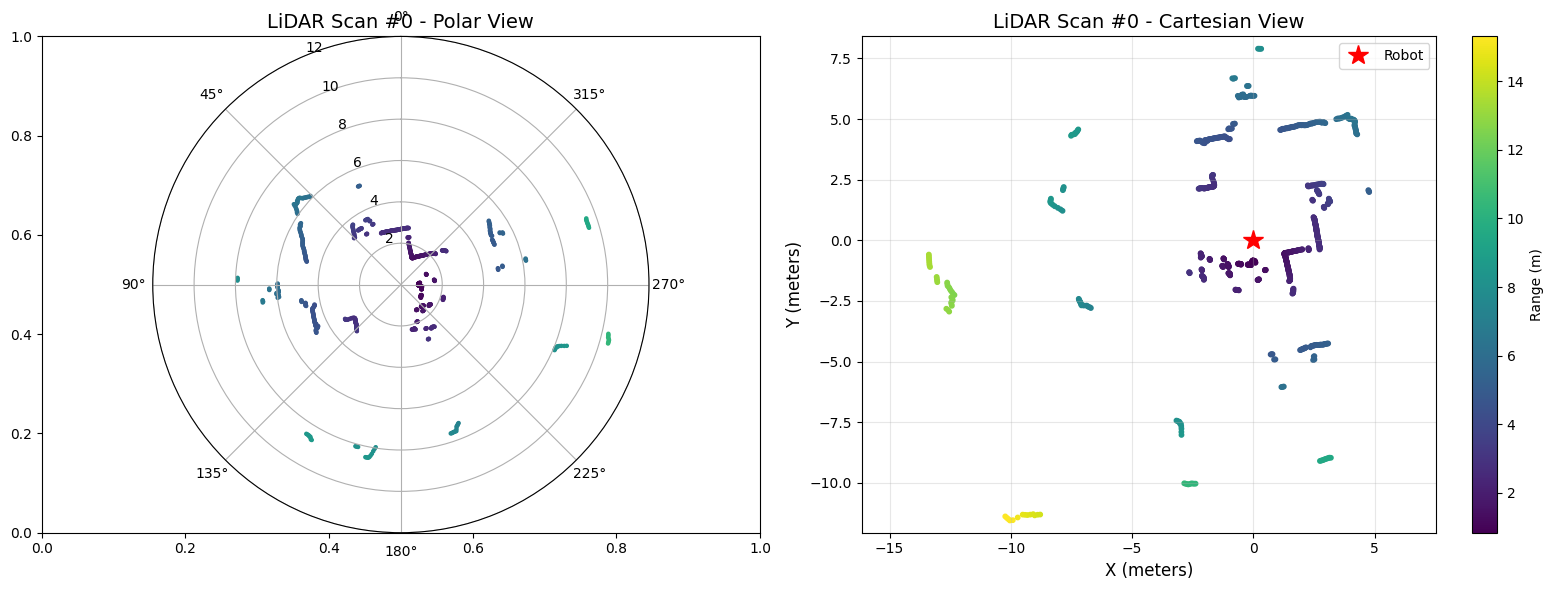

Scan timestamp: 1760649872.6855426
Valid points: 877 / 1147


In [20]:
# Visualize a single LiDAR scan
scan_idx = 0  # Index of scan to visualize
scan = lidar_df.iloc[scan_idx]

# Select all columns that start with 'ranges_'
range_columns = [col for col in lidar_df.columns if col.startswith('ranges_')]
ranges = scan[range_columns].values.astype(float)

x, y, angles, valid_ranges = laserscan_to_cartesian(
    ranges, scan['angle_min'], scan['angle_increment']
)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Polar plot
ax1 = plt.subplot(121, projection='polar')
ax1.scatter(angles, valid_ranges, s=5, c=valid_ranges, cmap='viridis')
ax1.set_title(f'LiDAR Scan #{scan_idx} - Polar View', fontsize=14)
ax1.set_theta_zero_location('N')
ax1.set_ylim(0, scan['range_max'])

# Cartesian plot
ax2 = plt.subplot(122)
scatter = ax2.scatter(x, y, s=10, c=valid_ranges, cmap='viridis')
ax2.plot(0, 0, 'r*', markersize=15, label='Robot')  # Robot position
ax2.set_xlabel('X (meters)', fontsize=12)
ax2.set_ylabel('Y (meters)', fontsize=12)
ax2.set_title(f'LiDAR Scan #{scan_idx} - Cartesian View', fontsize=14)
ax2.axis('equal')
ax2.grid(True, alpha=0.3)
ax2.legend()
plt.colorbar(scatter, ax=ax2, label='Range (m)')

plt.tight_layout()
plt.show()

print(f"Scan timestamp: {scan['Time']}")
print(f"Valid points: {len(valid_ranges)} / {len(ranges)}")

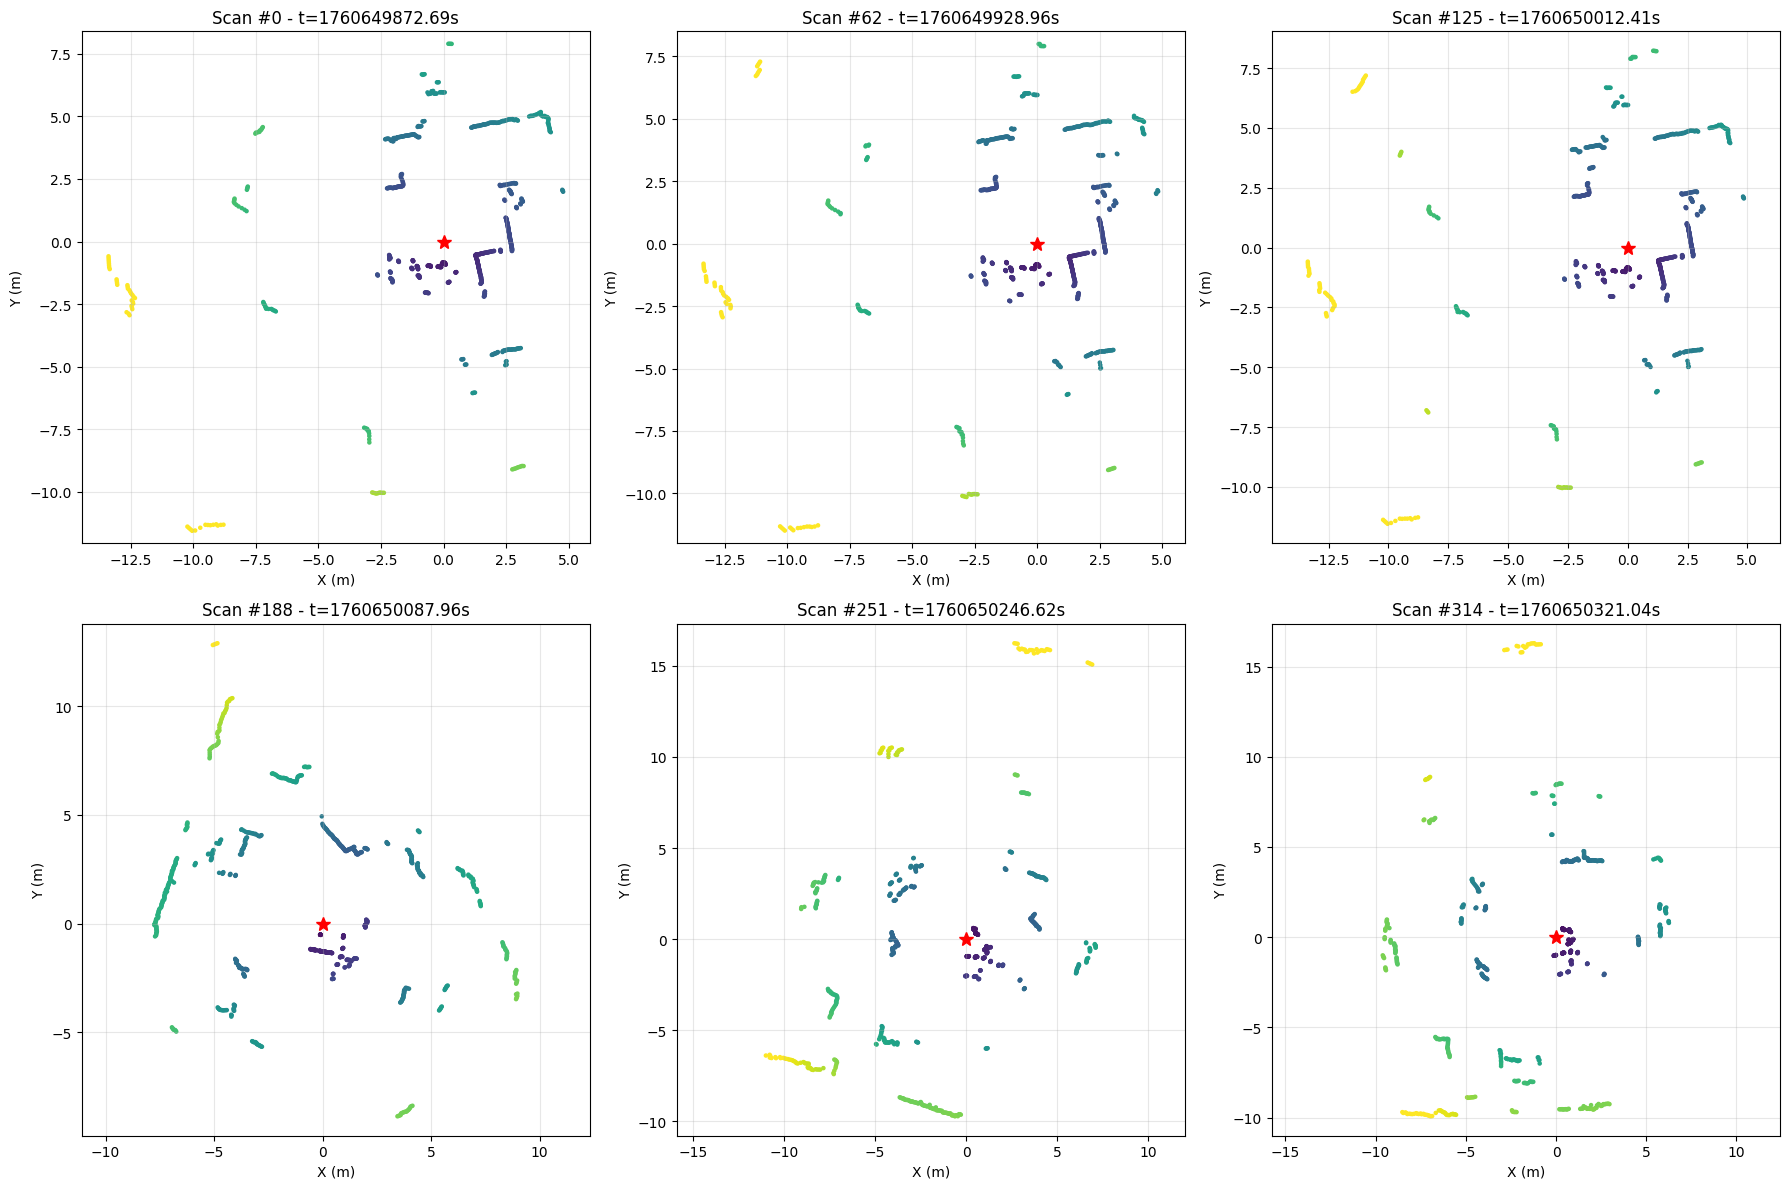

In [21]:
# Visualize multiple scans
num_scans_to_plot = min(6, len(lidar_df))
scan_indices = np.linspace(0, len(lidar_df)-1, num_scans_to_plot, dtype=int)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, scan_idx in enumerate(scan_indices):
    scan = lidar_df.iloc[scan_idx]
    # Select all columns that start with 'ranges_'
    range_columns = [col for col in lidar_df.columns if col.startswith('ranges_')]
    ranges = scan[range_columns].values.astype(float)

    x, y, angles, valid_ranges = laserscan_to_cartesian(
        ranges, scan['angle_min'], scan['angle_increment']
    )

    ax = axes[i]
    scatter = ax.scatter(x, y, s=5, c=valid_ranges, cmap='viridis', vmin=0, vmax=scan['range_max'])
    ax.plot(0, 0, 'r*', markersize=10)
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title(f'Scan #{scan_idx} - t={scan["Time"]:.2f}s')
    ax.axis('equal')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# Analyze range statistics across all scans
print("Analyzing range statistics across all scans...")

all_ranges = []
for idx in range(len(lidar_df)):
    # Select all columns that start with 'ranges_'
    range_columns = [col for col in lidar_df.columns if col.startswith('ranges_')]
    ranges = lidar_df.iloc[idx][range_columns].values.astype(float)

    valid_mask = np.isfinite(ranges) & (ranges > 0)
    valid_ranges = ranges[valid_mask]
    all_ranges.extend(valid_ranges)

all_ranges = np.array(all_ranges)

print(f"\nTotal valid range measurements: {len(all_ranges):,}")
print(f"Min range: {all_ranges.min():.4f} m")
print(f"Max range: {all_ranges.max():.4f} m")
print(f"Mean range: {all_ranges.mean():.4f} m")
print(f"Median range: {np.median(all_ranges):.4f} m")
print(f"Std dev: {all_ranges.std():.4f} m")

Analyzing range statistics across all scans...

Total valid range measurements: 268,345
Min range: 0.3150 m
Max range: 23.1360 m
Mean range: 4.3425 m
Median range: 3.2840 m
Std dev: 3.2865 m


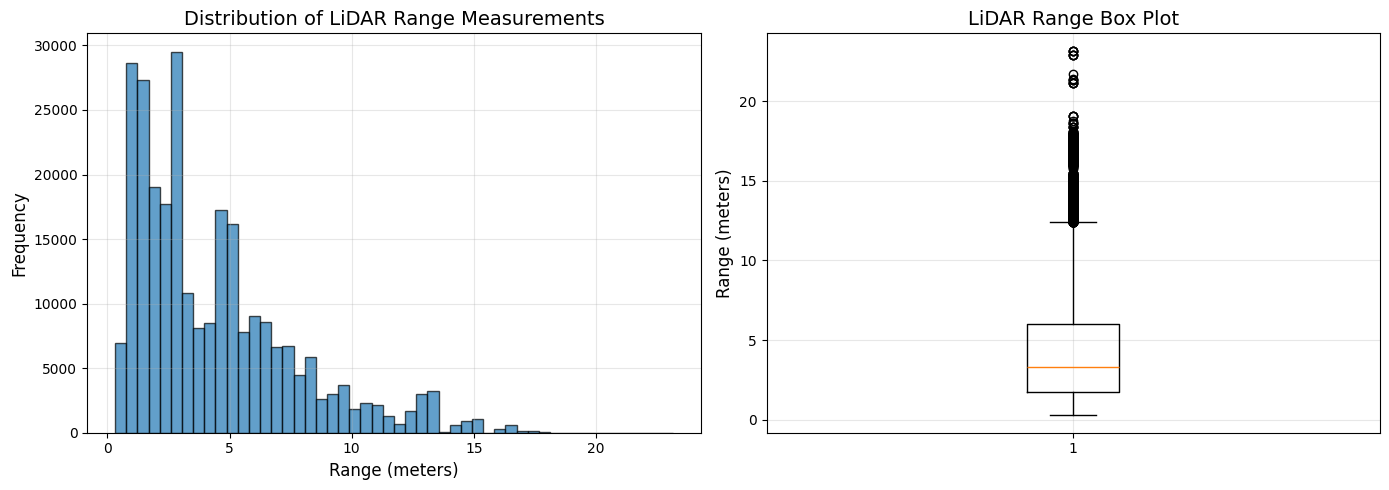

In [25]:
# Plot range distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(all_ranges, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Range (meters)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of LiDAR Range Measurements', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(all_ranges, vert=True)
axes[1].set_ylabel('Range (meters)', fontsize=12)
axes[1].set_title('LiDAR Range Box Plot', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [26]:
# Create summary statistics
print("\n" + "="*60)
print("LIDAR DATA SUMMARY")
print("="*60)
print(f"Source bag: {bag_file}")
print(f"LiDAR topic: {lidar_topic}")
print(f"Total scans: {len(lidar_df)}")
print(f"\nScan parameters:")
print(f"  Angular range: {np.rad2deg(first_scan['angle_min']):.1f}° to {np.rad2deg(first_scan['angle_max']):.1f}°")
print(f"  Angular resolution: {np.rad2deg(first_scan['angle_increment']):.2f}°")
print(f"  Range: {first_scan['range_min']:.2f}m to {first_scan['range_max']:.2f}m")
print(f"  Points per scan: {len(ranges_sample)}")
print(f"  Scan rate: {1.0/first_scan['scan_time']:.1f} Hz")
print(f"\nData quality:")
print(f"  Total measurements: {len(all_ranges):,}")
print(f"  Average valid points per scan: {len(all_ranges)/len(lidar_df):.1f}")
print("="*60)


LIDAR DATA SUMMARY
Source bag: /content/drive/MyDrive/DATA/Artificial_Intelligence/MNA-V/Subjects/TC5035-Proyecto_Integrador/TC5035.data/ROS_bags/session_20251016_133216/session_data.bag
LiDAR topic: /scan
Total scans: 315

Scan parameters:
  Angular range: -180.0° to 180.0°
  Angular resolution: 0.31°
  Range: 0.15m to 12.00m
  Points per scan: 1147
  Scan rate: 7.5 Hz

Data quality:
  Total measurements: 268,345
  Average valid points per scan: 851.9
